<a href="https://colab.research.google.com/github/kmk3593/google_drive/blob/main/chapter_4_1_%EA%B9%80%EB%AF%BC%EA%B7%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀
- 대상이 어떤 타깃에 속할 확률을 구한다.

### 데이터 불러오기
- 컬럼 설명 177p 그림

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


- unique()
  - 어떤 종류의 생선이 있는지 species 열에서 고유한 값을 추출한다.

In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


### 데이터 변환
- 배열로 변환

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]  # Diagonal = 대각선
fish_input.shape

(159, 5)

- target 배열로 변환
- 종속변수

In [ ]:
fish_target = fish['Species'].to_numpy()

### 훈련 데이터와 테스트 데이터
- 이제 데이터를 훈련 세트와 테스트 세트로 나눈다.
- 외워야 할 정도로 중요. 자주 쓰다보면 외워진다.

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

- 표준화 전처리
  - 이유가 중요하다
  - 사이킷런의 StandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리한다.
  - 반드시 훈련 세트의 통계값으로 테스트 세트를 변환해야 한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
print(train_input[:5])
print(train_scaled[:5])

     Weight  Length  Diagonal   Height   Width
26    720.0    35.0      40.6  16.3618  6.0900
137   500.0    45.0      48.0   6.9600  4.8960
146     7.5    10.5      11.6   1.9720  1.1600
90    110.0    22.0      23.5   5.5225  3.9950
66    140.0    20.7      23.2   8.5376  3.2944
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


### k-최근접 이웃 분류기의 확률 예측
- 필요한 데이터를 모두 준비했다.
- 이제 k-최근접 이웃 분류기로 테스트 세트에 들어 있느 확률을 예측한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)  # 최근접 이웃 개수를 3으로 지정
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 182p

- 다중 분류( multi-class classification)
  - 앞서 fish  데이터프레임에서 7종류의 생선이 있었다.
  - fish['Species']를 사용해 타깃 데이터를 만들었기에 두 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있다.
  - 이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 '다중 분류'라 부른다.


In [ ]:
import numpy as np

# predict_proba() 메서드로 클래스별 확률 값을 반환한다.
proba = kn.predict_proba(test_scaled[:5])

# round()함수. 소수점 네번째 자리로 반올림
print(np.round(proba, decimals = 4))

# 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 알파벨 순으로 매겨진다.
print(kn.classes_)   

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- 위 코드의 결과는 어떤 물고기일지에 대한 확률이다.
  - 예를 들어, 1번째 샘플은 100% 확률로 perch이다.
  - 에를 들어, 4번째 샘플은 66% 확률로 perch이고, 33% 확률로 Roach이다.

# 로지스틱 회귀
- 중요도 : 최상
- 오늘 유튜브 영상 반드시 시청
  + 개념 재복습 반드시 필요
- Why?
  + 로지스틱 회귀
    + 기초 통계로도 활용 (의학통계)
    + 머신러닝 부류모형의 기초 모형인데, 성능이 생각보다 나쁘지 않음
      - 데이터셋, 수치 테이터 기반
    + 딥러닝 : 초기모형에 해당됨.

- 이름은 회귀이지만 분류 모델이다.
- 선형 회귀와 동일하게 선형 방정식을 학습한다.
  - 예를 들어 다음과 같다.
    - z = a x (weight) + b x (length) + c x (Diagonal) + d x (Height) + e x (width) + f
    - 여기에서 a, b, c, d, e는 가중치 혹은 계수이다.
    - z 가 확률이 되려면 0~1 사이의 값이어야 한다.
    - 이를 위해 사용하는 것이 시그모이드 함수( 또는 로지스틱 함수)이다.

- 1 / ( 1 + e^(-z) ) 
  - 이 식이 로지스틱 함수( 시그모이드 함수) 이다.
- 넘파이를 사용하여 z의 그래프를 그려보자.
  - -5와 5 사이에서 0.1 간격으로 배열 z를 만든 다음 z 위치마다 로지스틱 함수를 계산한다.
  - 함수 계산은 np.exp() 함수를 사용한다.

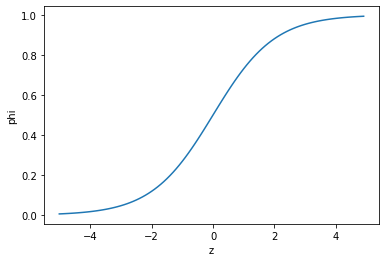

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)   # 간격조절
phi = 1 / (1 + np.exp(-z))  # exp는 거듭제곱, z는 범위 표시
# print(z)
# print(phi)

plt.plot(z, phi)  # 문서를 봐야 함
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

- 개발자 취업을 원한다면
  + 공부 별도로 하지 않는다!
  + 다만 알고리즘의 컨셉은 이해해야 한다.
  + 얘기가 서로 통해야 하기 때문에

- 데이터 분석 관련 지망이라면
  + 공부해야 한다.

### 로지스틱 회귀로 이진 분류 수행하기
- 사이킷런에는 로지스틱 회귀모델인 LogisticRegression 클래스가 준비되어 있다.
- 이진 분류이 경우
  - 로지스틱 함수의 출력이 0.5보다 크면 양성 클래스
  - 로지스틱 함수의 출력이 0.5보다 작으면 음성 클래스

- 불리언 인덱싱 (boolean indexing)
  - 넘파일 배열은 True, False 값을 전달하여 행을 선택할 수 있다.
  - 이를 불리언 인덱싱이라고 부른다.

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


- A 와 C만 True이므로 위 결과가 나온다.
- 이와 같은 방식으로 훈련 세트에서 도미(bream)와 빙어(smelt)의 행만 골라낸다.
- 비교 연산자를  사용하면 도미와 빙어의 행을 True로 만들 수 있다.


In [ ]:
# OR 연산자(|) 를 사용하여 비교 결과를 합친다.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

- 위에서 bream_smelt_indexes 배열은 도미와 빙어일 경우만 True값이 들어간다.
- 이 배열을 사용해 train_scaled와 train_targt 배열에 불리언 인덱싱을 적용하여 도미와 빙어 데이터만 골라낼 수 있다.

- 186p
- 모형 만들고 예측하기!
- 이제 이 데이터로 로지스틱 회귀 모델을 훈련한다.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#         독립변수             종속변수
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

- 훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 예측한다.

In [ ]:
# 예측하기
# 클래스로 분류
# 확률값 -> 0.5
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


- 2 번째 샘플을 제외하고 모두 도미로 예측했다.
- 예측 확률은 predict_proba() 메서드에서 제공한다.
- 처음 5개 샘플의 예측 확률을 출력해 본다.

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))  # predict_proba에서 예측 확률 제공
print(lr.classes_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


- 위에서 첫번째 열이 음성 클래스(0)에 대한 확률이다.
- 위에서 두번째 열이 양성 클래스(1)에 대한 확률이다.
- bream이 음성이고, smelt가 양성 클래스이다.  

- 이진 분류를 수행 완료했다.
- 이제 선형 회귀에서터럼 로지스틱 회귀가 학습한 계수를 확인한다.
- 방정식의 각 기울기와 상수를 구하는 코드


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- 이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같다.
  - z = -0.404 x (weight) -0.576 x (length) -0.663 x (Diagonal) -1.103 x (Height) -0.732 x (width) -2.161
  - 확실히 로지스틱 회귀는 선형 회귀와 비슷하다.

- LogistricRegression 모델로 z값을 계산해 보자.
- z식
- z값을 출력하자.

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


- 이 z값을 로지스틱 함수에 통과시키면 확률을 얻을 수 있다.
- expit() 함수를 이용해 편하게 계산 가능하다.
- 이 함수를 이용해 decisions 배열의 값을 확률로 변환한다.

In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


- 양성 클래스에 대한 z값을 반환했다.
- 지금까지 이진 분류를 통해 2종류의 생선 샘플을 골라냈고 이를 이용해 로지스틱 회귀 모델을 훈련했다.

- 188p

- Reference : 혼자 공부하는 머신러닝 + 딥러닝